In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd
import seaborn as sns
from pandas import ExcelWriter
from pandas import ExcelFile
import sample_utils

%matplotlib inline

# TRUE DATA

In [5]:
file_path = '2020_LER_20201102_testset_V04.xlsx'

data = np.load('../data_handler/'+file_path+'.npy', allow_pickle=True)
num_in_cycle = [250]*10
num_of_cycle = 10
    
X_all, Y_all, X_per_cycle, Y_per_cycle = data[0], data[1], data[2], data[3]
print(data[0].shape, data[1].shape, data[2].shape, data[3].shape)
print()
test_real = Y_all

# for pair plot indexing
test_X_cycle = X_per_cycle

y_mean = np.mean(Y_all, axis=0, dtype=np.float32)
y_std = np.std(Y_all, axis=0, dtype=np.float32)

print("!! check !! test real shape", test_real.shape)
print("!! check !! X value ( especially its precision )")
print()
for i in range(num_of_cycle):
    print(test_X_cycle[i])

(2500, 5) (2500, 6) (10, 5) (10, 6)

!! check !! test real shape (2500, 6)
!! check !! X value ( especially its precision )

[  0.62484672  17.00743225 173.85718891   1.           0.        ]
[ 0.55654727 80.91905766 80.56986979  1.          0.        ]
[ 0.50466944 48.62398816 67.99380535  1.          0.        ]
[ 0.56045148 25.42868151 69.39740975  1.          0.        ]
[ 0.63730798 69.14860261 65.33037708  1.          0.        ]
[  0.72951307  89.39156879 205.62484728   1.           0.        ]
[ 0.15273618 23.32639122 51.25326965  1.          0.        ]
[ 0.68988283 85.08858437 80.98368203  1.          0.        ]
[ 0.25925637 78.12653757 28.08679576  1.          0.        ]
[1.41144023e-01 9.67099798e+01 1.86683747e+02 1.00000000e+00
 0.00000000e+00]


# GENERATED DATA
### Please put your sampled data file(in .npy) in the same directory

In [6]:
########################################  CHANGE HERE ####################################################################

result = 'test_specificnaive_date_210130_data_2020_LER_20201008_V008.xlsx_model_mlp_gan1_seed_0_lr_5e-05_0.0001_0.0001_hidden_dim_100_50_batch_size_32_noise_d_100_sample_num_125_tr_num_in_cycle_50_pdrop_0.9.npy'

##########################################################################################################################

test_gen = np.load(result, allow_pickle=True)

num_of_cycle = 10


test_gen_sample_num = int(test_gen.shape[0]/num_of_cycle)

print("test data sample num", test_gen_sample_num)
print("test data shape", test_gen.shape)


test data sample num 125
test data shape (1250, 6)


In [7]:
test_gen

array([[2.24069267e-12, 4.21214907e-05, 1.59167348e-05, 3.41839882e-01,
        3.49920064e-01, 6.16865033e+01],
       [1.02125869e-12, 4.02434127e-05, 1.67692419e-05, 3.57177986e-01,
        3.65453687e-01, 6.11401550e+01],
       [1.02748398e-12, 3.77353790e-05, 1.40950835e-05, 3.56796675e-01,
        3.63505946e-01, 6.10434789e+01],
       ...,
       [2.52240445e-12, 4.35987972e-05, 1.71316381e-05, 3.38279906e-01,
        3.45957351e-01, 6.17674474e+01],
       [2.07823492e-12, 4.30671191e-05, 1.65293120e-05, 3.41670982e-01,
        3.49706661e-01, 6.15049018e+01],
       [3.06838612e-12, 4.41332895e-05, 1.76288938e-05, 3.34663727e-01,
        3.44120807e-01, 6.20244565e+01]])

# EMD integral

In [8]:
# def EMD_true_vs_true(test_real, num_of_cycle, num_in_cycle, num_in_cycle_sub_1, num_in_cycle_sub_2, seed, verbose=False):
    
#     print("seed: ", seed)
#     np.random.seed(seed)
#     cumul = 0
#     test_real_split = []
#     for i in range(num_of_cycle):
#         test_real_split.append(test_real[cumul:cumul+num_in_cycle[i]])
#         cumul += num_in_cycle[i]


#     #num_in_cycle_sub_1 = 25
#     num_in_real_list_sub_1 = [num_in_cycle_sub_1]*num_of_cycle
#     test_real_split_sub_1 = []
#     for i in range(num_of_cycle):
#         sub_1_index = np.random.choice(num_in_cycle[i], num_in_cycle_sub_1, replace=False)
#         test_real_split_sub_1.append(test_real_split[i][sub_1_index])
#     test_real_sub_1 = np.concatenate(np.array(test_real_split_sub_1))


#     #num_in_cycle_sub_2 = 25
#     num_in_real_list_sub_2 = [num_in_cycle_sub_2]*num_of_cycle
#     test_real_split_sub_2 = []
#     for i in range(num_of_cycle):
#         sub_2_index = np.random.choice(num_in_cycle[i], num_in_cycle_sub_2, replace=False)
#         test_real_split_sub_2.append(test_real_split[i][sub_2_index])
#     test_real_sub_2 = np.concatenate(np.array(test_real_split_sub_2))
    
#     min1_per_out_v = test_real_sub_1.min(axis=0)
#     max1_per_out_v = test_real_sub_1.max(axis=0)
#     print("minimum y value for each varaible:", min1_per_out_v)
#     print("maximum y value for each varaible:", max1_per_out_v)

#     min2_per_out_v = test_real_sub_2.min(axis=0)
#     max2_per_out_v = test_real_sub_2.max(axis=0)
#     print("minimum y value for each varaible:", min2_per_out_v)
#     print("maximum y value for each varaible:", max2_per_out_v)

#     min_per_out_v = np.minimum(min1_per_out_v, min2_per_out_v)
#     max_per_out_v = np.maximum(max1_per_out_v, max2_per_out_v)
    
    
#     # EMD  
#     EMD_1d_score_list, EMD_2d_score_list = sample_utils.EMD_all_pair_each_X_integral(generated_samples = test_real_sub_1, real_samples = test_real_sub_2, num_coordinate=10, num_of_cycle=num_of_cycle, num_in_gen_list=num_in_real_list_sub_1, num_in_real_list = num_in_real_list_sub_2,  min_list = min_per_out_v, max_list = max_per_out_v) 

#     print(EMD_1d_score_list.shape)
#     print(EMD_2d_score_list.shape)

#     EMD_score_cat = np.hstack((EMD_1d_score_list, EMD_2d_score_list))

#     EMD_score = np.mean(EMD_score_cat)
#     EMD_score_list_integral = np.mean(EMD_score_cat,axis=1)
#     EMD_std = np.sqrt(np.mean((EMD_score - EMD_score_list_integral)**2))

#     for i in range(len(EMD_score_list_integral)):        
#         print("EMD_score for each X factor {} \t score {:5f} \t dev {:5f}".format(i, EMD_score_list_integral[i], (EMD_score_list_integral[i]-EMD_score)/EMD_std))
#     # A: Ioff, B: IDSat, C: IDlin, D: VTsat, E:VTlin, F:SS, G: classs

#     EMD_score_list = np.array(EMD_score_list_integral)

#     print("EMD argsort: ", EMD_score_list.argsort())
    
#     return EMD_score_list

def EMD_true_vs_true(test_real, num_of_cycle, num_in_cycle, num_in_cycle_sub_1, num_in_cycle_sub_2, seed, verbose=False):
    
    print("seed: ", seed)
    np.random.seed(seed)
    cumul = 0
    test_real_split = []
    for i in range(num_of_cycle):
        test_real_split.append(test_real[cumul:cumul+num_in_cycle[i]])
        cumul += num_in_cycle[i]


    #num_in_cycle_sub_1 = 25
    num_in_real_list_sub_1 = [num_in_cycle_sub_1]*num_of_cycle
    test_real_split_sub_1 = []
    for i in range(num_of_cycle):
        sub_1_index = np.random.choice(num_in_cycle[i], num_in_cycle_sub_1, replace=False)
        test_real_split_sub_1.append(test_real_split[i][sub_1_index])
    test_real_sub_1 = np.concatenate(np.array(test_real_split_sub_1))


    #num_in_cycle_sub_2 = 25
    num_in_real_list_sub_2 = [num_in_cycle_sub_2]*num_of_cycle
    test_real_split_sub_2 = []
    for i in range(num_of_cycle):
        sub_2_index = np.random.choice(num_in_cycle[i], num_in_cycle_sub_2, replace=False)
        test_real_split_sub_2.append(test_real_split[i][sub_2_index])
    test_real_sub_2 = np.concatenate(np.array(test_real_split_sub_2))
    
    min1_per_out_v = test_real_sub_1.min(axis=0)
    max1_per_out_v = test_real_sub_1.max(axis=0)
    print("minimum y value for each varaible:", min1_per_out_v)
    print("maximum y value for each varaible:", max1_per_out_v)

    min2_per_out_v = test_real_sub_2.min(axis=0)
    max2_per_out_v = test_real_sub_2.max(axis=0)
    print("minimum y value for each varaible:", min2_per_out_v)
    print("maximum y value for each varaible:", max2_per_out_v)

    min_per_out_v = np.minimum(min1_per_out_v, min2_per_out_v)
    max_per_out_v = np.maximum(max1_per_out_v, max2_per_out_v)
    
    
    # EMD  
    EMD_1d_score_list, EMD_2d_score_list = sample_utils.EMD_all_pair_each_X_integral(generated_samples = test_real_sub_1, real_samples = test_real_sub_2, num_coordinate=10, num_of_cycle=num_of_cycle, num_in_gen_list=num_in_real_list_sub_1, num_in_real_list = num_in_real_list_sub_2,  min_list = min_per_out_v, max_list = max_per_out_v) 

    print(EMD_1d_score_list.shape)
    print(EMD_2d_score_list.shape)

    EMD_score_cat = np.hstack((EMD_1d_score_list, EMD_2d_score_list))

    EMD_score = np.mean(EMD_score_cat)
    EMD_score_list_integral = np.mean(EMD_score_cat,axis=1)
    EMD_std = np.sqrt(np.mean((EMD_score - EMD_score_list_integral)**2))

    EMD_element = np.zeros((num_of_cycle, 3))
    for i in range(len(EMD_score_list_integral)):
        EMD_element[i, 0] = i
        EMD_element[i, 1] = num_in_cycle_sub_1
        EMD_element[i, 2] = EMD_score_list_integral[i]
        
        print("EMD_score for each X factor {} \t score {:5f} \t dev {:5f}".format(i, EMD_score_list_integral[i], (EMD_score_list_integral[i]-EMD_score)/EMD_std))
        
    # A: Ioff, B: IDSat, C: IDlin, D: VTsat, E:VTlin, F:SS, G: classs

    EMD_score_list = np.array(EMD_score_list_integral)

    print("EMD argsort: ", EMD_score_list.argsort())
    
    return EMD_score_list, EMD_element

# def EMD_fake_vs_true(test_gen, test_real, num_of_cycle, num_in_cycle, num_in_cycle_sub_1, num_in_cycle_sub_2, test_gen_sample_num):

#     cumul = 0
#     cumul_gen = 0
#     test_real_split = []
#     test_gen_split = []
#     for i in range(num_of_cycle):
#         test_real_split.append(test_real[cumul:cumul+num_in_cycle[i]])
#         test_gen_split.append(test_gen[cumul_gen:cumul_gen+test_gen_sample_num])
#         cumul += num_in_cycle[i]
#         cumul_gen += test_gen_sample_num

#     #num_in_cycle_sub_1 = 25
#     num_in_gen_list_sub_1 = [num_in_cycle_sub_1]*num_of_cycle
#     test_gen_split_sub_1 = []
#     for i in range(num_of_cycle):
#         sub_1_index = np.random.choice(test_gen_sample_num, num_in_cycle_sub_1, replace=False)
#         test_gen_split_sub_1.append(test_gen_split[i][sub_1_index])
#     test_gen_sub_1 = np.concatenate(np.array(test_gen_split_sub_1))


#     #num_in_cycle_sub_2 = 25
#     num_in_real_list_sub_2 = [num_in_cycle_sub_2]*num_of_cycle
#     test_real_split_sub_2 = []
#     for i in range(num_of_cycle):
#         sub_2_index = np.random.choice(num_in_cycle[i], num_in_cycle_sub_2, replace=False)
#         test_real_split_sub_2.append(test_real_split[i][sub_2_index])
#     test_real_sub_2 = np.concatenate(np.array(test_real_split_sub_2))
    
    
#     min1_per_out_v = test_gen_sub_1.min(axis=0)
#     max1_per_out_v = test_gen_sub_1.max(axis=0)
#     print("minimum y value for each varaible:", min1_per_out_v)
#     print("maximum y value for each varaible:", max1_per_out_v)

#     min2_per_out_v = test_real_sub_2.min(axis=0)
#     max2_per_out_v = test_real_sub_2.max(axis=0)
#     print("minimum y value for each varaible:", min2_per_out_v)
#     print("maximum y value for each varaible:", max2_per_out_v)

#     min_per_out_v = np.minimum(min1_per_out_v, min2_per_out_v)
#     max_per_out_v = np.maximum(max1_per_out_v, max2_per_out_v)
    
#     # EMD  
#     EMD_1d_score_list, EMD_2d_score_list = sample_utils.EMD_all_pair_each_X_integral(generated_samples = test_gen_sub_1, real_samples = test_real_sub_2, num_coordinate=10, num_of_cycle=num_of_cycle, num_in_gen_list=num_in_gen_list_sub_1, num_in_real_list = num_in_real_list_sub_2, min_list = min_per_out_v, max_list = max_per_out_v) 

#     print(EMD_1d_score_list.shape)
#     print(EMD_2d_score_list.shape)

#     EMD_score_cat = np.hstack((EMD_1d_score_list, EMD_2d_score_list))

#     EMD_score = np.mean(EMD_score_cat)
#     EMD_score_list_integral = np.mean(EMD_score_cat,axis=1)
#     EMD_std = np.sqrt(np.mean((EMD_score - EMD_score_list_integral)**2))

#     for i in range(len(EMD_score_list_integral)):
#         print("EMD_score for each X factor {} \t score {:5f} \t dev {:5f}".format(i, EMD_score_list_integral[i], (EMD_score_list_integral[i]-EMD_score)/EMD_std))
#     # A: Ioff, B: IDSat, C: IDlin, D: VTsat, E:VTlin, F:SS, G: classs

#     EMD_score_list = np.array(EMD_score_list_integral)

#     print("EMD argsort: ", EMD_score_list.argsort())
    
#     return EMD_score_list

In [9]:
np.set_printoptions(linewidth=1000)

In [10]:
seed = 4
EMD_score_list, EMD_element = EMD_true_vs_true(test_real, num_of_cycle, num_in_cycle, num_in_cycle_sub_1=25, num_in_cycle_sub_2=25, seed=seed)
EMD_element

seed:  4
minimum y value for each varaible: [3.0220e-13 2.8550e-05 1.1500e-05 3.2400e-01 3.3600e-01 6.0799e+01]
maximum y value for each varaible: [5.9720e-12 4.5630e-05 1.8540e-05 3.9400e-01 3.9700e-01 6.3371e+01]
minimum y value for each varaible: [5.3770e-13 3.4060e-05 1.3260e-05 3.2000e-01 3.3400e-01 6.0822e+01]
maximum y value for each varaible: [7.8870e-12 4.4440e-05 1.8600e-05 3.7500e-01 3.7800e-01 6.3717e+01]
(10, 6)
(10, 15)
EMD_score for each X factor 0 	 score 0.280961 	 dev 0.146159
EMD_score for each X factor 1 	 score 0.275965 	 dev 0.106823
EMD_score for each X factor 2 	 score 0.286349 	 dev 0.188586
EMD_score for each X factor 3 	 score 0.327253 	 dev 0.510668
EMD_score for each X factor 4 	 score 0.231800 	 dev -0.240944
EMD_score for each X factor 5 	 score 0.247735 	 dev -0.115466
EMD_score for each X factor 6 	 score 0.103130 	 dev -1.254106
EMD_score for each X factor 7 	 score 0.581336 	 dev 2.511354
EMD_score for each X factor 8 	 score 0.139920 	 dev -0.964416


array([[ 0.        , 25.        ,  0.28096114],
       [ 1.        , 25.        ,  0.27596547],
       [ 2.        , 25.        ,  0.28634923],
       [ 3.        , 25.        ,  0.32725301],
       [ 4.        , 25.        ,  0.23179989],
       [ 5.        , 25.        ,  0.24773522],
       [ 6.        , 25.        ,  0.10313038],
       [ 7.        , 25.        ,  0.58133605],
       [ 8.        , 25.        ,  0.13992034],
       [ 9.        , 25.        ,  0.14954149]])

In [13]:
# EMD_fake_vs_true(test_gen, test_real, num_of_cycle, num_in_cycle, num_in_cycle_sub_1=25, num_in_cycle_sub_2=25, test_gen_sample_num=test_gen_sample_num)

In [14]:
num_in_cycle

[250, 250, 250, 250, 250, 250, 250, 250, 250, 250]

In [15]:
true_vs_true_search_range = [5, 10, 25, 50, 75, 100, 125, 200, 230]
true_vs_true_EMDs_set = np.zeros((len(true_vs_true_search_range),num_of_cycle))
seed = 4
for i in range(len(true_vs_true_search_range)) :
    print('i',i)
    num_in_cycle_sub = true_vs_true_search_range[i]
    true_vs_true_EMDs_set[i] = EMD_true_vs_true(test_real, num_of_cycle, num_in_cycle, num_in_cycle_sub_1=num_in_cycle_sub, num_in_cycle_sub_2=num_in_cycle_sub, seed=seed)

i 0
seed:  4
minimum y value for each varaible: [9.0010e-13 3.6600e-05 1.3990e-05 3.2600e-01 3.3800e-01 6.0936e+01]
maximum y value for each varaible: [5.7070e-12 4.4960e-05 1.8380e-05 3.6100e-01 3.6900e-01 6.3288e+01]
minimum y value for each varaible: [6.7240e-13 3.4060e-05 1.4170e-05 3.2600e-01 3.3700e-01 6.0895e+01]
maximum y value for each varaible: [5.2660e-12 4.3990e-05 1.7950e-05 3.6900e-01 3.7400e-01 6.2985e+01]
(10, 6)
(10, 15)
EMD_score for each X factor 0 	 score 0.306648 	 dev -0.588085
EMD_score for each X factor 1 	 score 0.550667 	 dev 0.047851
EMD_score for each X factor 2 	 score 1.264270 	 dev 1.907565
EMD_score for each X factor 3 	 score 0.980420 	 dev 1.167826
EMD_score for each X factor 4 	 score 0.585717 	 dev 0.139195
EMD_score for each X factor 5 	 score 0.924456 	 dev 1.021978
EMD_score for each X factor 6 	 score 0.069655 	 dev -1.205709
EMD_score for each X factor 7 	 score 0.267837 	 dev -0.689231
EMD_score for each X factor 8 	 score 0.236840 	 dev -0.770

ValueError: cannot copy sequence with size 2 to array axis with dimension 10

In [ ]:
print(true_vs_true_EMDs_set)

In [ ]:
true_vs_true_EMDs_set

In [ ]:

# seed = 4
# np.random.seed(seed)

# sample = 10

# seed_range = np.random.choice(1000,sample)
# print("seed range: ", seed_range)

# # true_vs_true_search_range = [5, 10, 25, 50, 75, 100, 125, 200, 230]
# true_vs_true_search_range = [100, 200]
# print("search range: ", true_vs_true_search_range)

# true_vs_true_EMDs_set = np.zeros((len(seed_range), len(true_vs_true_search_range), num_of_cycle))

# for j in range(len(seed_range)):
#     for i in range(len(true_vs_true_search_range)) :
#         print('seed: ', seed_range[j], 'search: ', true_vs_true_search_range[i])
#         num_in_cycle_sub = true_vs_true_search_range[i]
#         true_vs_true_EMDs_set[j, i, :] = EMD_true_vs_true(test_real, num_of_cycle, num_in_cycle, num_in_cycle_sub_1=num_in_cycle_sub, num_in_cycle_sub_2=num_in_cycle_sub, seed=seed_range[j])

In [17]:

print(true_vs_true_EMDs_set.shape)

(1600, 3)


In [18]:
mean = np.mean(true_vs_true_EMDs_set, axis=0)
mean

array([  4.5       , 112.5       ,   0.13625344])

In [19]:
var = np.var(true_vs_true_EMDs_set, axis=0)
var

array([8.25000000e+00, 3.28125000e+03, 1.30316191e-02])

In [21]:
true_vs_true_EMDs_set = np.load('EMD.npy')

# seed = 4
# np.random.seed(seed)

# sample = 20
# num_of_cycle = 10
# seed_range = np.random.choice(1000, sample)
# print("seed range: ", seed_range)

# # true_vs_true_search_range = [5, 10, 25, 50, 75, 100, 125, 200, 230]
# true_vs_true_search_range = [25, 50, 75, 100, 125, 150, 175, 200]
# print("search range: ", true_vs_true_search_range)

# true_vs_true_EMDs_set = np.zeros((len(seed_range)*len(true_vs_true_search_range)*num_of_cycle, 3))
# print(len(seed_range)*len(true_vs_true_search_range)*num_of_cycle)
        
# for i in range(len(true_vs_true_search_range)):
#     for j in range(len(seed_range)):
        
#         num_in_cycle_sub = true_vs_true_search_range[i]
#         _, EMD_element = EMD_true_vs_true(test_real, num_of_cycle, num_in_cycle, num_in_cycle_sub_1=num_in_cycle_sub, num_in_cycle_sub_2=num_in_cycle_sub, seed=seed_range[j])
        
#         print(i*len(seed_range)*num_of_cycle+j*num_of_cycle)
#         true_vs_true_EMDs_set[i*len(seed_range)*num_of_cycle+j*num_of_cycle:i*len(seed_range)*num_of_cycle+j*num_of_cycle+num_of_cycle,:] = EMD_element


In [23]:
# np.save('./'+'EMD', true_vs_true_EMDs_set)
print(true_vs_true_EMDs_set.shape)

(1600, 3)


In [24]:
dataset = pd.DataFrame({'test': true_vs_true_EMDs_set[:,0], 'search': true_vs_true_EMDs_set[:,1], 'emd': true_vs_true_EMDs_set[:,2]})
print(dataset)

      test  search       emd
0      0.0    25.0  0.276884
1      1.0    25.0  0.234755
2      2.0    25.0  0.343631
3      3.0    25.0  0.447162
4      4.0    25.0  0.237943
...    ...     ...       ...
1595   5.0   200.0  0.083535
1596   6.0   200.0  0.028108
1597   7.0   200.0  0.224485
1598   8.0   200.0  0.013899
1599   9.0   200.0  0.014329

[1600 rows x 3 columns]


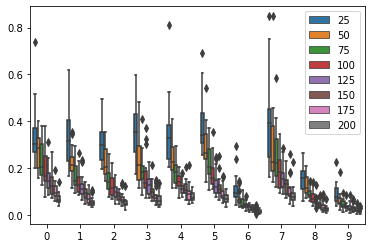

In [25]:
import seaborn as sns

sns.boxplot(x=true_vs_true_EMDs_set[:,0].astype(int), y=true_vs_true_EMDs_set[:,2], hue=true_vs_true_EMDs_set[:,1].astype(int))
plt.show()

In [26]:
index1 = true_vs_true_EMDs_set[:,0] == 1
print(index1)
index6 =  true_vs_true_EMDs_set[:,0] == 6
print(index6)

factor1 = true_vs_true_EMDs_set[index1]
factor6 = true_vs_true_EMDs_set[index6]
print(factor1.shape)
factor16 = np.vstack((factor1, factor6))
print(factor16.shape)

[False  True False ... False False False]
[False False False ... False False False]
(160, 3)
(320, 3)


     test  search       emd
0     1.0    25.0  0.234755
1     1.0    25.0  0.280161
2     1.0    25.0  0.467178
3     1.0    25.0  0.403697
4     1.0    25.0  0.337093
..    ...     ...       ...
315   6.0   200.0  0.004655
316   6.0   200.0  0.024937
317   6.0   200.0  0.014743
318   6.0   200.0  0.028823
319   6.0   200.0  0.028108

[320 rows x 3 columns]


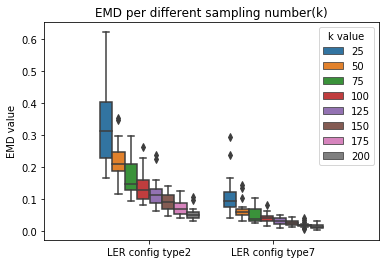

In [27]:
dataset16 = pd.DataFrame({'test': factor16[:,0], 'search': factor16[:,1], 'emd': factor16[:,2]})
print(dataset16)

f = sns.boxplot(x=factor16[:,0].astype(int), y=factor16[:,2], hue=factor16[:,1].astype(int))
f.set_ylabel('EMD value')
f.legend(title="k value")

plt.title('EMD per different sampling number(k)')
plt.xticks([0,1], ['LER config type2', 'LER config type7'])
plt.plot()

plt.savefig('paper_result/num_in_cycle_EMD_fig.png')


[False False False ... False False False]
(200, 3)
     test  search       emd
0     0.0   125.0  0.105251
1     1.0   125.0  0.224349
2     2.0   125.0  0.082740
3     3.0   125.0  0.129488
4     4.0   125.0  0.078603
..    ...     ...       ...
195   5.0   125.0  0.125369
196   6.0   125.0  0.033660
197   7.0   125.0  0.249480
198   8.0   125.0  0.033175
199   9.0   125.0  0.034567

[200 rows x 3 columns]
0.1031368117729085


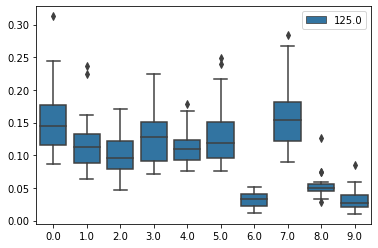

In [28]:
# 125의 mean
index125 = true_vs_true_EMDs_set[:,1] == 125
print(index125)

factor125 = true_vs_true_EMDs_set[index125]
print(factor125.shape)


dataset125 = pd.DataFrame({'test': factor125[:,0], 'search': factor125[:,1], 'emd': factor125[:,2]})
print(dataset125)
print(dataset125['emd'].mean())

sns.boxplot(x=factor125[:,0], y=factor125[:,2], hue=factor125[:,1])
plt.show()

# Optimal EMD

In [37]:
seed_range = [0, 999, 1996, 234, 934, 512, 24, 59, 693, 124]

file_path = '2020_LER_20201102_testset_V04.xlsx'

EMD_result = []

for i in range(len(seed_range)):
    print(seed_range[i])

    name = '_seed_{}'.format(seed_range[i])

    # data_A

    data = np.load('../data_handler/'+file_path+'_data_a'+name+'.npy', allow_pickle=True)
    num_in_cycle_half = [125]*10
    num_of_cycle = 10

    A_X_all, A_Y_all, A_X_per_cycle, A_Y_per_cycle = np.array(data[0]), np.array(data[1]), np.array(data[2]), np.array(data[3])
    A_test_real = A_Y_all

    # for pair plot indexing
    A_test_X_cycle = A_X_per_cycle

    A_y_mean = np.mean(A_Y_all, axis=0, dtype=np.float32)
    A_y_std = np.std(A_Y_all, axis=0, dtype=np.float32)

    print("!! check !! test real shape", A_test_real.shape)
    print("!! check !! X value ( especially its precision )")
    print()

    # data_B

    data = np.load('../data_handler/'+file_path+'_data_b'+name+'.npy', allow_pickle=True)

    B_X_all, B_Y_all, B_X_per_cycle, B_Y_per_cycle = np.array(data[0]), np.array(data[1]), np.array(data[2]), np.array(data[3])
    B_test_real = B_Y_all

    # for pair plot indexing
    B_test_X_cycle = B_X_per_cycle

    B_y_mean = np.mean(B_Y_all, axis=0, dtype=np.float32)
    B_y_std = np.std(B_Y_all, axis=0, dtype=np.float32)

    print("!! check !! test real shape", B_test_real.shape)
    print("!! check !! X value ( especially its precision )")
    print()
    
    min1_per_out_v = A_test_real.min(axis=0)
    max1_per_out_v = A_test_real.max(axis=0)
    print("minimum y value for each varaible:", min1_per_out_v)
    print("maximum y value for each varaible:", max1_per_out_v)

    min2_per_out_v = B_test_real.min(axis=0)
    max2_per_out_v = B_test_real.max(axis=0)
    print("minimum y value for each varaible:", min2_per_out_v)
    print("maximum y value for each varaible:", max2_per_out_v)

    min_per_out_v = np.minimum(min1_per_out_v, min2_per_out_v)
    max_per_out_v = np.maximum(max1_per_out_v, max2_per_out_v)
    
    # EMD  
    EMD_1d_score_list, EMD_2d_score_list = sample_utils.EMD_all_pair_each_X_integral(generated_samples = A_test_real, real_samples = B_test_real, num_coordinate=10, num_of_cycle=num_of_cycle, num_in_gen_list=num_in_cycle_half, num_in_real_list = num_in_cycle_half, min_list = min_per_out_v, max_list = max_per_out_v) 

    print(EMD_1d_score_list.shape)
    print(EMD_2d_score_list.shape)

    EMD_score_cat = np.hstack((EMD_1d_score_list, EMD_2d_score_list))

    EMD_score = np.mean(EMD_score_cat)
    EMD_score_list_integral = np.mean(EMD_score_cat,axis=1)
    EMD_std = np.sqrt(np.mean((EMD_score - EMD_score_list_integral)**2))

    for i in range(len(EMD_score_list_integral)):
        print("EMD_score for each X factor {} \t score {:5f} \t dev {:5f}".format(i, EMD_score_list_integral[i], (EMD_score_list_integral[i]-EMD_score)/EMD_std))
    # A: Ioff, B: IDSat, C: IDlin, D: VTsat, E:VTlin, F:SS, G: classs

    EMD_score_list = np.array(EMD_score_list_integral)
    print("EMD score: ", EMD_score)
    print("EMD argsort: ", EMD_score_list.argsort())
    
    EMD_result.append(EMD_score_list)
    print(EMD_result)
    
EMD_result = np.array(EMD_result)

0
!! check !! test real shape (1250, 6)
!! check !! X value ( especially its precision )

!! check !! test real shape (1250, 6)
!! check !! X value ( especially its precision )

minimum y value for each varaible: [3.0220e-13 2.8550e-05 1.1500e-05 3.2000e-01 3.3400e-01 6.0765e+01]
maximum y value for each varaible: [7.8870e-12 4.5680e-05 1.8750e-05 3.9400e-01 3.9700e-01 6.3717e+01]
minimum y value for each varaible: [4.0750e-13 2.6090e-05 1.1970e-05 3.1800e-01 3.3000e-01 6.0804e+01]
maximum y value for each varaible: [8.3370e-12 4.5900e-05 1.8470e-05 3.8600e-01 3.8800e-01 6.3893e+01]
(10, 6)
(10, 15)
EMD_score for each X factor 0 	 score 0.155053 	 dev -0.128358
EMD_score for each X factor 1 	 score 0.181427 	 dev 0.125650
EMD_score for each X factor 2 	 score 0.221912 	 dev 0.515573
EMD_score for each X factor 3 	 score 0.167679 	 dev -0.006753
EMD_score for each X factor 4 	 score 0.252553 	 dev 0.810673
EMD_score for each X factor 5 	 score 0.408027 	 dev 2.308072
EMD_score for each 

(10, 6)
(10, 15)
EMD_score for each X factor 0 	 score 0.136341 	 dev 0.141467
EMD_score for each X factor 1 	 score 0.150823 	 dev 0.372598
EMD_score for each X factor 2 	 score 0.195327 	 dev 1.082890
EMD_score for each X factor 3 	 score 0.180280 	 dev 0.842735
EMD_score for each X factor 4 	 score 0.187001 	 dev 0.949998
EMD_score for each X factor 5 	 score 0.148459 	 dev 0.334871
EMD_score for each X factor 6 	 score 0.028131 	 dev -1.585602
EMD_score for each X factor 7 	 score 0.168488 	 dev 0.654528
EMD_score for each X factor 8 	 score 0.053928 	 dev -1.173865
EMD_score for each X factor 9 	 score 0.025999 	 dev -1.619620
EMD score:  0.12747772935483817
EMD argsort:  [9 6 8 0 5 1 7 3 4 2]
[array([0.15505327, 0.18142686, 0.22191247, 0.16767947, 0.25255268, 0.40802736, 0.03805651, 0.13035189, 0.06672609, 0.06201978]), array([0.22894991, 0.30272899, 0.35117361, 0.15147487, 0.14021395, 0.15236187, 0.04091294, 0.13433881, 0.05760808, 0.02401531]), array([0.12185668, 0.12617309, 0.

(10, 6)
(10, 15)
EMD_score for each X factor 0 	 score 0.136744 	 dev 0.143344
EMD_score for each X factor 1 	 score 0.115878 	 dev -0.193963
EMD_score for each X factor 2 	 score 0.160451 	 dev 0.526566
EMD_score for each X factor 3 	 score 0.164080 	 dev 0.585232
EMD_score for each X factor 4 	 score 0.222440 	 dev 1.528629
EMD_score for each X factor 5 	 score 0.153430 	 dev 0.413067
EMD_score for each X factor 6 	 score 0.035278 	 dev -1.496859
EMD_score for each X factor 7 	 score 0.194927 	 dev 1.083880
EMD_score for each X factor 8 	 score 0.057106 	 dev -1.144012
EMD_score for each X factor 9 	 score 0.038431 	 dev -1.445885
EMD score:  0.12787650480060148
EMD argsort:  [6 9 8 1 0 5 2 3 7 4]
[array([0.15505327, 0.18142686, 0.22191247, 0.16767947, 0.25255268, 0.40802736, 0.03805651, 0.13035189, 0.06672609, 0.06201978]), array([0.22894991, 0.30272899, 0.35117361, 0.15147487, 0.14021395, 0.15236187, 0.04091294, 0.13433881, 0.05760808, 0.02401531]), array([0.12185668, 0.12617309, 0

In [39]:
EMD_result

array([[0.15505327, 0.18142686, 0.22191247, 0.16767947, 0.25255268, 0.40802736, 0.03805651, 0.13035189, 0.06672609, 0.06201978],
       [0.22894991, 0.30272899, 0.35117361, 0.15147487, 0.14021395, 0.15236187, 0.04091294, 0.13433881, 0.05760808, 0.02401531],
       [0.12185668, 0.12617309, 0.1884717 , 0.24019518, 0.18601073, 0.27451237, 0.0438596 , 0.18741074, 0.04820512, 0.0763734 ],
       [0.20078167, 0.15058305, 0.19484264, 0.15384106, 0.13833013, 0.13069946, 0.07862607, 0.11986404, 0.10065774, 0.04539793],
       [0.25149749, 0.09423487, 0.08061605, 0.13271006, 0.17597665, 0.17836371, 0.03233364, 0.26050538, 0.0736197 , 0.05635758],
       [0.13634148, 0.15082317, 0.19532707, 0.18027997, 0.18700064, 0.14845933, 0.02813056, 0.16848769, 0.05392828, 0.02599911],
       [0.13042569, 0.09838182, 0.11025059, 0.10542803, 0.22578569, 0.2197066 , 0.06589382, 0.17647192, 0.08426506, 0.02929822],
       [0.29046606, 0.15941384, 0.23318364, 0.1067852 , 0.10353875, 0.22362242, 0.07042653, 0.359

In [44]:
np.mean(EMD_result, axis=0)

array([0.20016746, 0.15150707, 0.20233505, 0.15617568, 0.17860301, 0.21030446, 0.04865617, 0.18988028, 0.06522307, 0.053465  ])

In [45]:
np.std(EMD_result, axis=0)

array([0.07420451, 0.05665627, 0.07484879, 0.03665746, 0.04367549, 0.07827484, 0.01658478, 0.06811111, 0.01639212, 0.03067641])

In [1]:
# fake_vs_true_search_range = [5, 10, 25, 50, 75, 100, 125]
# fake_vs_true_EMDs_set = np.zeros((len(fake_vs_true_search_range),num_of_cycle))
# for i in range(len(fake_vs_true_search_range)) :
#     print('i',i)    
#     num_in_cycle_sub = fake_vs_true_search_range[i]
#     fake_vs_true_EMDs_set[i] = EMD_fake_vs_true(test_gen, test_real, num_of_cycle, num_in_cycle, num_in_cycle_sub_1=num_in_cycle_sub, num_in_cycle_sub_2=num_in_cycle_sub, test_gen_sample_num=test_gen_sample_num)

In [16]:
# print(fake_vs_true_EMDs_set)

[[0.16495986 0.37989465 1.38126859 0.24754767 0.52177838 1.1443815  0.90814025 0.31820714]
 [0.20343237 0.32692179 0.3342355  0.28549141 0.46451105 1.83511668 0.73264086 0.91775805]
 [0.2643972  0.34116011 0.34174047 0.35895272 0.29553591 1.28981986 0.70610456 0.90405769]
 [0.42890627 0.38781182 0.42118563 0.1593965  0.26787488 1.03967322 1.52535614 1.05775072]
 [0.31911235 0.47167193 0.39291181 0.31620607 0.4020825  1.72712239 0.70531172 1.13406931]
 [0.27397078 0.4032292  0.44885336 0.27020616 0.23917231 1.32296027 0.7391126  0.85511274]
 [0.29796719 0.38978675 0.30748755 0.26836136 0.42314965 1.31885754 0.69589625 1.27578256]]


In [19]:
# fake_vs_true_EMDs_set

In [26]:
# true_0 = np.array([[0.8266487 , 0.55093051, 1.62765442, 0.17890637, 0.14756212, 0.28398686, 0.63925868, 0.1905602 ],
#        [0.32943756, 0.61558017, 0.29440626, 0.35581493, 0.8408085 , 0.20773761, 0.47052951, 0.33580146],
#        [0.31267713, 0.2992364 , 0.16877917, 0.32970996, 0.14107211, 0.34550035, 0.30393295, 0.56271593],
#        [0.14016112, 0.08764927, 0.18969876, 0.18285475, 0.07962641, 0.14468856, 0.07295444, 0.14522758],
#        [0.20893906, 0.12989758, 0.12435243, 0.21361855, 0.17891435, 0.1476308 , 0.13483269, 0.15815261],
#        [0.1328374 , 0.12050848, 0.08679163, 0.24245635, 0.16820557, 0.14866351, 0.13241014, 0.15785952],
#        [0.09314047, 0.15082961, 0.09961669, 0.15316511, 0.10360745, 0.08921403, 0.11256826, 0.17368485],
#        [0.05376158, 0.06244415, 0.06540703, 0.05359813, 0.11646252, 0.06201199, 0.08826579, 0.06539997],
#        [0.0087301 , 0.08265326, 0.03461872, 0.02708203, 0.07051421, 0.04966067, 0.03067888, 0.04655163]])
# true_1 = np.array([[0.12411692, 0.15100096, 0.57129024, 0.45364378, 1.15260915, 0.33802871, 0.60125745, 0.1196452 ],
#        [0.47029367, 0.18976065, 0.31942932, 0.19092366, 0.39429193, 0.29404448, 0.25634082, 0.22027114],
#        [0.16612979, 0.33487219, 0.10938659, 0.30577304, 0.19564205, 0.32736886, 0.1661468 , 0.1246929 ],
#        [0.2489328 , 0.10308788, 0.17177268, 0.14393284, 0.16338329, 0.12801476, 0.1447183 , 0.12604922],
#        [0.14582181, 0.18209073, 0.15351294, 0.12739879, 0.32017942, 0.13362108, 0.09427326, 0.20688869],
#        [0.13482969, 0.10804191, 0.19704337, 0.12762222, 0.15915649, 0.2004535 , 0.17202813, 0.18257276],
#        [0.06428541, 0.09828846, 0.13385657, 0.12097328, 0.09438638, 0.08945933, 0.15418489, 0.06787365],
#        [0.08140166, 0.07048234, 0.06717345, 0.10910659, 0.08006077, 0.04835756, 0.05998378, 0.04611016],
#        [0.011771  , 0.03855837, 0.04060902, 0.02114135, 0.06398925, 0.01901949, 0.05245652, 0.03804641]])
# true_2 = np.array([[1.00662629, 1.71006815, 0.1451272 , 0.64934461, 0.55612733, 0.37086339, 0.2486387 , 0.92383495],
#        [0.12933557, 0.41590401, 0.23112059, 0.21630368, 0.31832683, 0.13326909, 0.15518149, 0.31658443],
#        [0.30377349, 0.28419041, 0.18610981, 0.42708849, 0.22344453, 0.25896912, 0.32068481, 0.22420297],
#        [0.31869358, 0.21863154, 0.077854  , 0.164133  , 0.12235308, 0.16055981, 0.12023085, 0.12466645],
#        [0.12233714, 0.09951905, 0.28042537, 0.19770483, 0.10263636, 0.17472413, 0.07237753, 0.26292513],
#        [0.04927767, 0.11141288, 0.10258527, 0.09736454, 0.3153179 , 0.0655274 , 0.11345928, 0.10175443],
#        [0.15497969, 0.1250379 , 0.08226601, 0.14811427, 0.10607482, 0.10505833, 0.10287055, 0.09745968],
#        [0.09788062, 0.04930404, 0.04796285, 0.05877151, 0.09426986, 0.12982136, 0.04294029, 0.03868669],
#        [0.01312096, 0.07979615, 0.03516172, 0.02551518, 0.02551047, 0.02592808, 0.02750804, 0.02558031]])
# true_3 = np.array([[0.15609949, 0.22308538, 0.14696255, 0.77718265, 0.37644927, 0.24091543, 0.40525424, 0.55742863],
#        [0.50732069, 0.20103656, 0.31033193, 0.9428812 , 0.48095251, 0.33861402, 0.32384944, 0.28702692],
#        [0.51544672, 0.17923731, 0.41738427, 0.20967902, 0.25430604, 0.18686489, 0.54540353, 0.3810227 ],
#        [0.13468213, 0.18451245, 0.13778576, 0.13222632, 0.52550027, 0.2039808 , 0.34926597, 0.17533179],
#        [0.15556146, 0.17401031, 0.15650177, 0.38609053, 0.15647888, 0.12364359, 0.13766917, 0.16286014],
#        [0.13620173, 0.09208405, 0.15523179, 0.20413416, 0.31360131, 0.13639592, 0.12105336, 0.19139292],
#        [0.06623514, 0.1940104 , 0.1195291 , 0.12680174, 0.06507922, 0.10467962, 0.1755928 , 0.14401417],
#        [0.04964486, 0.06017018, 0.07476765, 0.0415299 , 0.06730805, 0.08678711, 0.0571928 , 0.02902952],
#        [0.00529853, 0.06449941, 0.03200166, 0.02471037, 0.04532804, 0.07026672, 0.07287721, 0.03930425]])
# true_4 = np.array([[3.07626686e-01, 2.42895501e-01, 5.46251787e-01, 2.06185467e-01, 3.96419939e+00, 4.99894562e-01, 2.13822332e-01, 5.06385815e-01],
#        [1.48087742e-01, 3.19477116e-01, 2.89848656e-01, 3.23016114e-01, 3.59403226e-01, 2.93657999e-01, 2.60797318e-01, 3.82965326e-01],
#        [4.61305218e-01, 2.21769631e-01, 4.07700162e-01, 1.31051901e-01, 2.36325595e-01, 2.40512004e-01, 3.83172750e-01, 2.44197909e-01],
#        [1.72608013e-01, 1.93576069e-01, 1.52062276e-01, 2.87428046e-01, 5.59293435e-01, 2.05538114e-01, 1.12631118e-01, 1.74841966e-01],
#        [2.05722906e-01, 1.42009136e-01, 1.55181313e-01, 1.40863413e-01, 1.86672757e-01, 1.20158288e-01, 1.48291642e-01, 8.31958786e-02],
#        [7.62468987e-02, 1.73334723e-01, 9.18560638e-02, 7.54585820e-02, 1.57121043e-01, 7.48363983e-02, 1.47710582e-01, 1.53600200e-01],
#        [6.29001516e-02, 9.08346808e-02, 7.11363985e-02, 8.30371890e-02, 9.12525315e-02, 7.20182859e-02, 1.34376880e-01, 5.01547825e-02],
#        [3.91934021e-02, 1.22989513e-01, 1.07098523e-01, 4.07953564e-02, 3.05822910e-02, 3.49466541e-02, 9.93946102e-02, 8.62766091e-02],
#        [2.74661916e-03, 8.15552237e-02, 3.18549766e-02, 3.22666191e-02, 3.26641118e-02, 2.76753537e-02, 2.47304978e-02, 3.18695266e-02]])

In [30]:
# true_vs_true_hist = np.stack([true_0,true_1,true_2,true_3,true_4])
# print(true_vs_true_hist.shape)

(5, 9, 8)


In [31]:
# np.mean(true_vs_true_hist,axis=0)

array([[0.48422362, 0.5755961 , 0.60745724, 0.45305258, 1.23938945, 0.34673779, 0.42164628, 0.45957096],
       [0.31689505, 0.3483517 , 0.28902735, 0.40578792, 0.4787566 , 0.25346464, 0.29333972, 0.30852986],
       [0.35186647, 0.26386119, 0.257872  , 0.28066048, 0.21015806, 0.27184304, 0.34386817, 0.30736648],
       [0.20301553, 0.15749144, 0.1458347 , 0.18211499, 0.2900313 , 0.16855641, 0.15996014, 0.1492234 ],
       [0.16767648, 0.14550536, 0.17399476, 0.21313522, 0.18897635, 0.13995558, 0.11748886, 0.17480449],
       [0.10587868, 0.12107641, 0.12670162, 0.14940717, 0.22268046, 0.12517535, 0.1373323 , 0.15743597],
       [0.08830817, 0.13180021, 0.10128095, 0.12641832, 0.09208008, 0.09208592, 0.13591868, 0.10663743],
       [0.06437642, 0.07307804, 0.0724819 , 0.0607603 , 0.0777367 , 0.07238493, 0.06955545, 0.05310059],
       [0.00833344, 0.06941248, 0.03484922, 0.02614311, 0.04760122, 0.03851006, 0.04165023, 0.03627043]])

In [32]:
# np.var(true_vs_true_hist,axis=0)

array([[1.31737648e-01, 3.40573951e-01, 2.94332174e-01, 5.59381458e-02, 1.96714397e+00, 7.85018811e-03, 3.06012888e-02, 8.30450236e-02],
       [2.47249683e-02, 2.47321966e-02, 9.52192996e-04, 7.59777181e-02, 3.56407240e-02, 5.41011559e-03, 1.07685375e-02, 2.92024659e-03],
       [1.54164382e-02, 3.12802904e-03, 1.66055807e-02, 1.03797498e-02, 1.55877947e-03, 3.37543472e-03, 1.51757053e-02, 2.29809310e-02],
       [5.00691089e-03, 2.72160466e-03, 1.46435566e-03, 3.07229899e-03, 4.32747310e-02, 9.79955820e-04, 9.49149112e-03, 4.98802388e-04],
       [1.16603742e-03, 9.04317712e-04, 2.97425822e-03, 8.54516386e-03, 5.16629508e-03, 3.93180150e-04, 8.46172181e-04, 3.52134667e-03],
       [1.31322754e-03, 7.67018553e-04, 1.83011016e-03, 4.06092128e-03, 5.62982836e-03, 2.48725654e-03, 4.34132397e-04, 9.80051818e-04],
       [1.23566435e-03, 1.41583332e-03, 5.33439537e-04, 6.19564604e-04, 2.12756661e-04, 1.48948273e-04, 7.09497677e-04, 2.13390569e-03],
       [4.75253659e-04, 6.68557668e-04, 3

In [43]:
# np.int_(np.var(true_vs_true_hist,axis=0) / (np.mean(true_vs_true_hist,axis=0))**2*100)

array([[ 56, 102,  79,  27, 128,   6,  17,  39],
       [ 24,  20,   1,  46,  15,   8,  12,   3],
       [ 12,   4,  24,  13,   3,   4,  12,  24],
       [ 12,  10,   6,   9,  51,   3,  37,   2],
       [  4,   4,   9,  18,  14,   2,   6,  11],
       [ 11,   5,  11,  18,  11,  15,   2,   3],
       [ 15,   8,   5,   3,   2,   1,   3,  18],
       [ 11,  12,   7,  17,  13,  21,   9,  14],
       [ 21,   5,   0,   1,  13,  24,  19,   3]])

In [44]:
# np.sum(np.int_(np.var(true_vs_true_hist,axis=0) / (np.mean(true_vs_true_hist,axis=0))**2*100),axis=1)

array([454, 129,  96, 130,  68,  76,  55, 104,  86])

In [33]:
# fake_0=np.array([[0.18700499, 0.47251477, 1.05303211, 0.25230925, 0.41659449, 1.43821134, 0.58712381, 0.67383894],
#        [0.17685414, 0.49385601, 0.32795885, 0.36486219, 0.25165807, 0.44899168, 0.4572864 , 2.44073191],
#        [0.23006398, 0.26995956, 0.35724655, 0.32751558, 0.50081477, 1.27079516, 0.81081049, 1.17917214],
#        [0.23727282, 0.36951597, 0.4529362 , 0.35443517, 0.29728625, 1.56945358, 1.48390201, 1.56230554],
#        [0.3896225 , 0.35951498, 0.45244789, 0.33242542, 0.23985308, 1.54312235, 0.69567433, 1.46982265],
#        [0.35372962, 0.35517964, 0.47316707, 0.32069745, 0.40391999, 1.31120196, 0.68988275, 1.12765752],
#        [0.23408182, 0.32736043, 0.33750795, 0.29841112, 0.34980731, 1.42052606, 0.79331532, 0.78164182]])
# fake_1=np.array([[0.92040385, 0.75776032, 0.22376045, 0.63215013, 0.91611526, 1.75077897, 0.12272645, 1.19713823],
#        [0.78649246, 0.64632384, 0.3228886 , 0.32303768, 0.23481568, 0.5140977 , 0.83569312, 1.03287726],
#        [0.3083641 , 0.39760312, 0.33203088, 0.24885495, 0.71527661, 1.74074126, 0.69235794, 1.58321071],
#        [0.33558669, 0.31795402, 0.32777372, 0.30877338, 0.32180372, 1.53762714, 0.59202108, 1.14142297],
#        [0.28247296, 0.33865758, 0.34377516, 0.29314115, 0.48658207, 1.07032416, 0.69226418, 1.03393035],
#        [0.25950978, 0.3147941 , 0.42935814, 0.25310621, 0.32304028, 1.43065703, 0.68767732, 1.00621334],
#        [0.31728465, 0.3188075 , 0.39425921, 0.25577921, 0.35805079, 1.60801023, 0.56067706, 1.25558751]])
# fake_2=np.array([[0.85681053, 0.39563843, 0.34107732, 1.29749588, 0.37504497, 0.9152213 , 0.43975533, 0.90052254],
#        [0.38246757, 0.3779858 , 0.37258802, 0.66720909, 0.27905168, 1.2001616 , 0.36302384, 0.37577917],
#        [0.24015333, 0.39352101, 0.3580795 , 0.56554183, 0.26145735, 1.09598073, 0.43038581, 1.0899051 ],
#        [0.23093036, 0.31548135, 0.53692401, 0.2468476 , 0.35314566, 1.31087494, 0.88473824, 0.43796398],
#        [0.35203226, 0.34993141, 0.38115163, 0.19153   , 0.41143523, 1.17866743, 0.81804009, 0.93015771],
#        [0.26243783, 0.33158026, 0.3784587 , 0.24650559, 0.31024645, 1.62393922, 0.72421022, 1.31824919],
#        [0.33652621, 0.31945871, 0.37088323, 0.3048953 , 0.32553832, 1.24842514, 0.57696555, 1.1297387 ]])
# fake_3=np.array([[0.3684392 , 0.60303656, 0.1441518 , 0.39507732, 0.34960099, 0.75556366, 3.28078296, 1.30946766],
#        [0.35367737, 0.36263935, 0.43485882, 1.00631492, 0.56522239, 1.90902956, 0.25866968, 0.31971946],
#        [0.36508686, 0.31865079, 0.40875181, 0.31949726, 0.38078112, 0.66195139, 0.63234041, 1.41499844],
#        [0.31597673, 0.33726658, 0.47416973, 0.31296744, 0.46846052, 1.32020199, 0.80553126, 1.44154925],
#        [0.25219368, 0.28104784, 0.27706788, 0.29517508, 0.31497922, 1.36218096, 0.73782316, 0.89772582],
#        [0.33800563, 0.38618619, 0.3492915 , 0.22870012, 0.3664932 , 1.39360308, 0.68892203, 1.00231802],
#        [0.52495148, 0.36161401, 0.39747889, 0.26444448, 0.28234161, 1.5414254 , 1.22562188, 0.92229323]])
# fake_4=np.array([[0.16495986, 0.37989465, 1.38126859, 0.24754767, 0.52177838, 1.1443815 , 0.90814025, 0.31820714],
#        [0.20343237, 0.32692179, 0.3342355 , 0.28549141, 0.46451105, 1.83511668, 0.73264086, 0.91775805],
#        [0.2643972 , 0.34116011, 0.34174047, 0.35895272, 0.29553591, 1.28981986, 0.70610456, 0.90405769],
#        [0.42890627, 0.38781182, 0.42118563, 0.1593965 , 0.26787488, 1.03967322, 1.52535614, 1.05775072],
#        [0.31911235, 0.47167193, 0.39291181, 0.31620607, 0.4020825 , 1.72712239, 0.70531172, 1.13406931],
#        [0.27397078, 0.4032292 , 0.44885336, 0.27020616, 0.23917231, 1.32296027, 0.7391126 , 0.85511274],
#        [0.29796719, 0.38978675, 0.30748755, 0.26836136, 0.42314965, 1.31885754, 0.69589625, 1.27578256]])

In [34]:
# fake_vs_true_hist = np.stack([fake_0,fake_1,fake_2,fake_3,fake_4])
# print(fake_vs_true_hist.shape)

(5, 7, 8)


In [35]:
# np.mean(fake_vs_true_hist,axis=0)

array([[0.49952369, 0.52176895, 0.62865805, 0.56491605, 0.51582682, 1.20083135, 1.06770576, 0.8798349 ],
       [0.38058478, 0.44154536, 0.35850596, 0.52938306, 0.35905177, 1.18147944, 0.52946278, 1.01737317],
       [0.28161309, 0.34417892, 0.35956984, 0.36407247, 0.43077315, 1.21185768, 0.65439984, 1.23426882],
       [0.30973457, 0.34560595, 0.44259786, 0.27648402, 0.34171421, 1.35556617, 1.05830975, 1.12819849],
       [0.31908675, 0.36016475, 0.36947087, 0.28569554, 0.37098642, 1.37628346, 0.7298227 , 1.09314117],
       [0.29753073, 0.35819388, 0.41582575, 0.26384311, 0.32857445, 1.41647231, 0.70596098, 1.06191016],
       [0.34216227, 0.34340548, 0.36152337, 0.27837829, 0.34777754, 1.42744887, 0.77049521, 1.07300876]])

In [36]:
# np.var(fake_vs_true_hist,axis=0)

array([[1.06315607e-01, 2.01519101e-02, 2.45581403e-01, 1.53696905e-01, 4.35127735e-02, 1.28362929e-01, 1.28828770e+00, 1.28710753e-01],
       [4.76755497e-02, 1.36150338e-02, 1.76376823e-03, 7.51177366e-02, 1.73992023e-02, 3.87771309e-01, 4.82597214e-02, 5.86895442e-01],
       [2.47121922e-03, 2.29161981e-03, 7.00553143e-04, 1.14429095e-02, 2.70608403e-02, 1.21018793e-01, 1.58494782e-02, 5.74679113e-02],
       [5.27399990e-03, 8.18938074e-04, 4.72883071e-03, 4.60756584e-03, 4.80356461e-03, 3.63860616e-02, 1.42142052e-01, 1.53639817e-01],
       [2.37519035e-03, 3.85220769e-03, 3.35393715e-03, 2.42540437e-03, 7.25963721e-03, 5.67570478e-02, 2.20477140e-03, 4.23641477e-02],
       [1.60574166e-03, 1.08253216e-03, 2.07701569e-03, 9.84760950e-04, 3.09481345e-03, 1.27186150e-02, 4.63038438e-04, 2.38901891e-02],
       [9.53942904e-03, 7.83744963e-04, 1.18973037e-03, 3.81934892e-04, 2.11341169e-03, 1.78965105e-02, 5.89406867e-02, 3.70560729e-02]])

In [45]:
# np.int_(np.var(fake_vs_true_hist,axis=0) / (np.mean(fake_vs_true_hist,axis=0))**2*100)

array([[ 42,   7,  62,  48,  16,   8, 113,  16],
       [ 32,   6,   1,  26,  13,  27,  17,  56],
       [  3,   1,   0,   8,  14,   8,   3,   3],
       [  5,   0,   2,   6,   4,   1,  12,  12],
       [  2,   2,   2,   2,   5,   2,   0,   3],
       [  1,   0,   1,   1,   2,   0,   0,   2],
       [  8,   0,   0,   0,   1,   0,   9,   3]])

In [46]:
# np.sum(np.int_(np.var(fake_vs_true_hist,axis=0) / (np.mean(fake_vs_true_hist,axis=0))**2*100),axis=1)

array([312, 178,  40,  42,  18,   7,  21])